# Pycaret Classification for student exam performance dataset

Pipeline

## Load Dataset

In [1]:
from pycaret.classification import *

import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
import pycaret
from platform import python_version
print(f'Pycaret version: {pycaret.__version__}\nPython version: {python_version()}')


Pycaret version: 3.0.0
Python version: 3.9.16


In [3]:
# load sample dataset
from pycaret.datasets import get_data
data = pd.read_csv('./Data/exams.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
data_unseen = data.sample(frac=0.1)
data= data.drop(data_unseen.index)
print(f'Data for model: {data.shape}, \nData for unseen predicitions: {data_unseen.shape}')
data_unseen.to_csv('./Data/unseenData.csv', index=False)

Data for model: (900, 8), 
Data for unseen predicitions: (100, 8)


## Setup

In [5]:
from pycaret.classification import *
s = setup(data, target = 'parental level of education', ignore_features=['race/ethnicity_group B','race/ethnicity_group D','race/ethnicity_group E','race/ethnicity_group C','race/ethnicity_group A'])

,Description,Value
0,Session id,7106
1,Target,parental level of education
2,Target type,Multiclass
3,Target mapping,"associate's degree: 0, bachelor's degree: 1, high school: 2, master's degree: 3, some college: 4, some high school: 5"
4,Original data shape,"(900, 8)"
5,Transformed data shape,"(900, 12)"
6,Transformed train set shape,"(630, 12)"
7,Transformed test set shape,"(270, 12)"
8,Ignore features,5
9,Ordinal features,3


In [6]:
s.dataset_transformed

,gender,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group E,lunch,test preparation course,math score,reading score,writing score,parental level of education
689,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,27.0,26.0,4
725,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,49.0,47.0,49.0,0
613,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,78.0,82.0,2
142,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,86.0,83.0,87.0,1
884,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,77.0,76.0,77.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,58.0,56.0,56.0,2
251,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,88.0,65.0,70.0,5
812,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,65.0,62.0,63.0,0
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,35.0,41.0,5


#### Early EDA optional

In [31]:
#eda();

## Compare Models

In [32]:
#models()

In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.2635,0.0000,0.2635,0.2435,0.2438,0.0799,0.0819,1.0440
lr,Logistic Regression,0.2492,0.6015,0.2492,0.2382,0.2361,0.0658,0.0670,1.4210
lda,Linear Discriminant Analysis,0.2492,0.6014,0.2492,0.2370,0.2357,0.0679,0.0689,1.1500
nb,Naive Bayes,0.2349,0.5622,0.2349,0.2110,0.2048,0.0637,0.0670,1.0980
dummy,Dummy Classifier,0.2206,0.5000,0.2206,0.0487,0.0798,0.0000,0.0000,1.2660
svm,SVM - Linear Kernel,0.2127,0.0000,0.2127,0.0866,0.0964,0.0240,0.0292,1.0490
knn,K Neighbors Classifier,0.2111,0.5243,0.2111,0.1970,0.1954,0.0207,0.0214,1.5790
lightgbm,Light Gradient Boosting Machine,0.2095,0.5309,0.2095,0.2050,0.2049,0.0227,0.0228,1.3910
rf,Random Forest Classifier,0.2079,0.5254,0.2079,0.2088,0.2017,0.0183,0.0183,1.3000
et,Extra Trees Classifier,0.2079,0.5201,0.2079,0.2031,0.2005,0.0221,0.0221,1.3600


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=7106, solver='auto',
                tol=0.0001)

#### Create model choosen from above:

In [25]:
model = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2698,0.0000,0.2698,0.2647,0.2533,0.0867,0.0893
1,0.1905,0.0000,0.1905,0.1887,0.1874,-0.0142,-0.0143
2,0.2857,0.0000,0.2857,0.2720,0.2660,0.1040,0.1066
3,0.1905,0.0000,0.1905,0.1748,0.1808,-0.0155,-0.0156
4,0.2857,0.0000,0.2857,0.2707,0.2764,0.1099,0.1107
5,0.2698,0.0000,0.2698,0.2187,0.2393,0.0844,0.0865
6,0.2698,0.0000,0.2698,0.2218,0.2353,0.0904,0.0933
7,0.3175,0.0000,0.3175,0.3317,0.2927,0.1510,0.1562
8,0.2698,0.0000,0.2698,0.2490,0.2506,0.0890,0.0904


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Evaluate Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

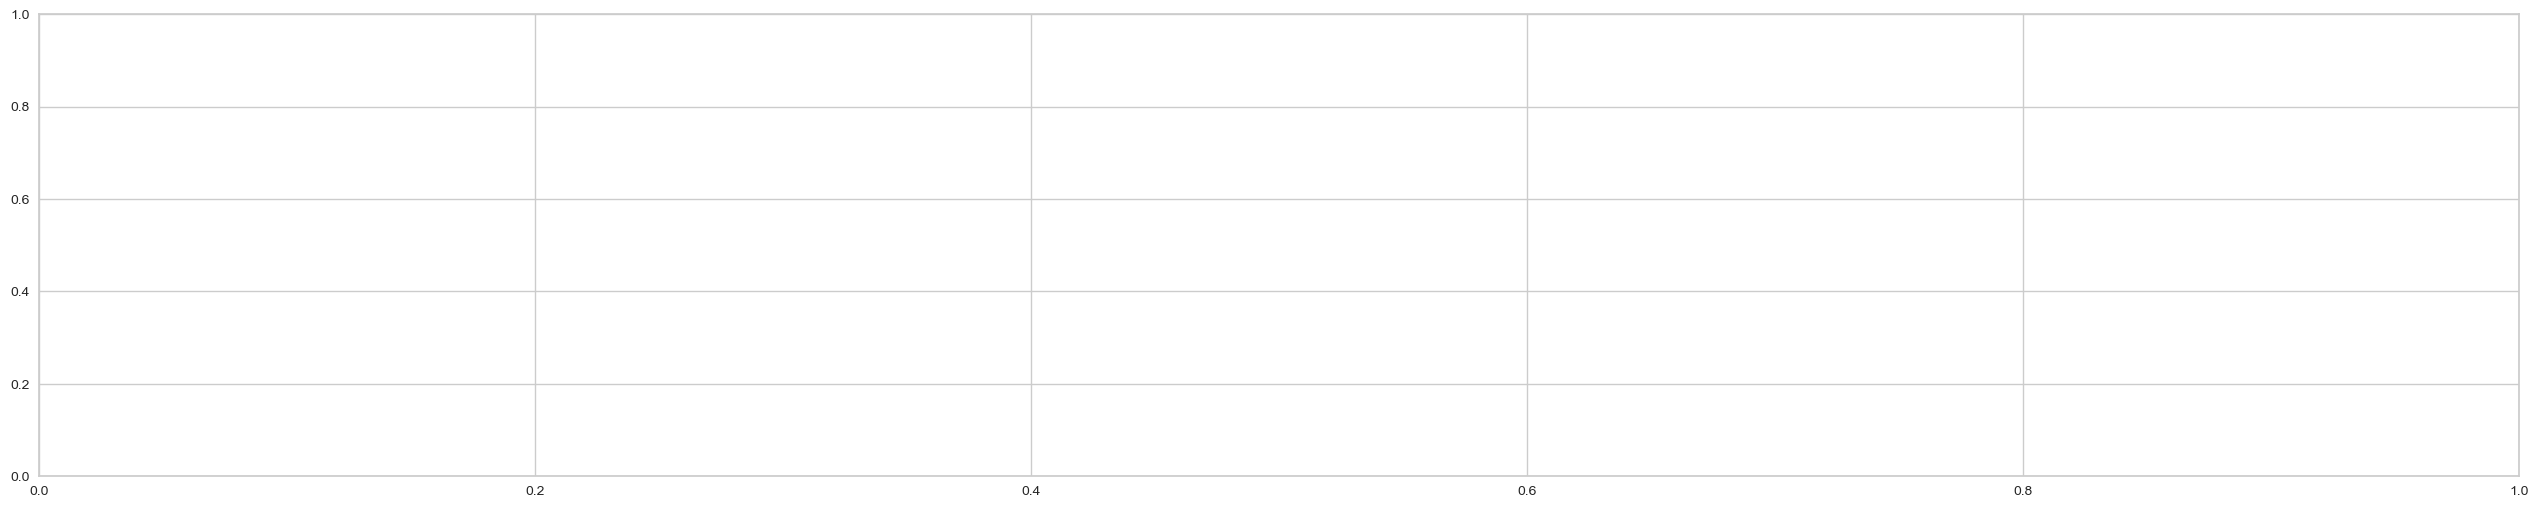

In [11]:
evaluate_model(model)

#### Print out graphs of value from the evaluation:

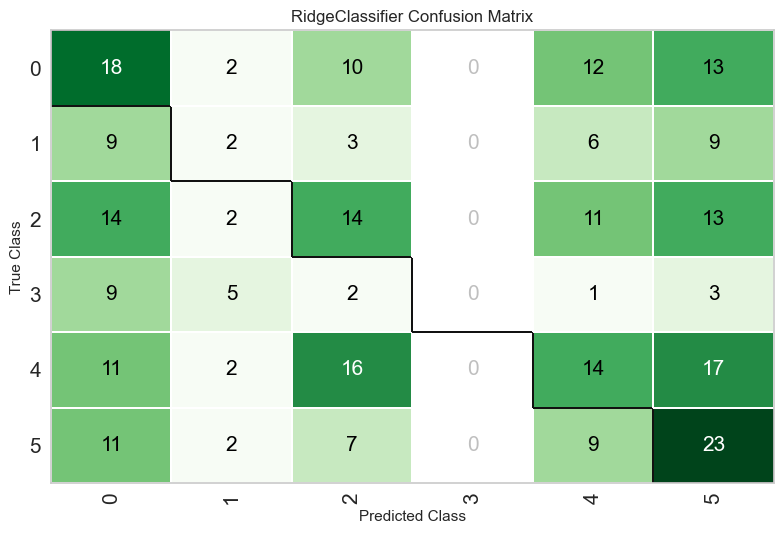

In [12]:
plot_model(model,plot='confusion_matrix')

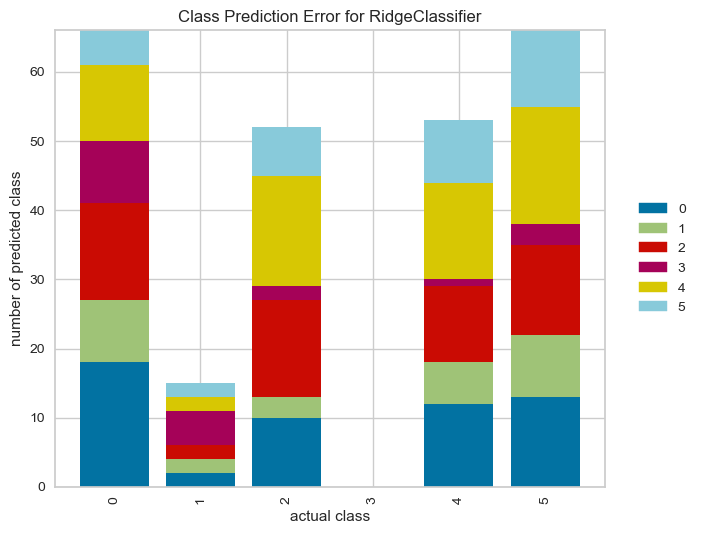

In [13]:
plot_model(model,plot='error')

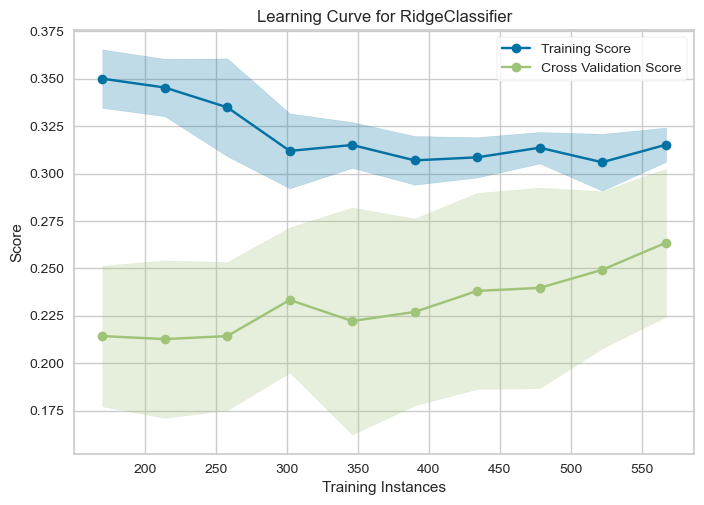

In [14]:
plot_model(model, plot='learning')

In [26]:
#plot_model(model, plot='residuals_interactive')

## Predict Model Choosen

In [27]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.2630,0,0,0,0,0.0809,0.0821


,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education,prediction_label
979,female,group B,free/reduced,completed,57,65,68,bachelor's degree,some college
152,female,group B,standard,none,63,79,76,associate's degree,some high school
527,female,group D,standard,completed,89,92,97,some college,associate's degree
999,male,group A,standard,completed,65,60,62,some college,some college
450,female,group B,standard,completed,55,62,64,high school,some high school
...,...,...,...,...,...,...,...,...,...
685,male,group D,standard,completed,58,56,56,high school,high school
251,male,group B,standard,none,88,65,70,some high school,associate's degree
812,male,group D,standard,none,65,62,63,associate's degree,high school
997,female,group C,free/reduced,none,32,35,41,some high school,some high school


## Tunning of Model (only if needed)

In [28]:
tuned_model = tune_model(model)
predict_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2698,0.0000,0.2698,0.2613,0.2528,0.0864,0.0889
1,0.1746,0.0000,0.1746,0.1570,0.1650,-0.0361,-0.0364
2,0.2857,0.0000,0.2857,0.2720,0.2660,0.1040,0.1066
3,0.1905,0.0000,0.1905,0.1748,0.1808,-0.0155,-0.0156
4,0.2857,0.0000,0.2857,0.2707,0.2764,0.1099,0.1107
5,0.2698,0.0000,0.2698,0.2187,0.2393,0.0844,0.0865
6,0.2698,0.0000,0.2698,0.2218,0.2353,0.0904,0.0933
7,0.3175,0.0000,0.3175,0.3317,0.2927,0.1510,0.1562
8,0.2698,0.0000,0.2698,0.2490,0.2506,0.0890,0.0904


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.2630,0,0,0,0,0.0809,0.0821


,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education,prediction_label
979,female,group B,free/reduced,completed,57,65,68,bachelor's degree,some college
152,female,group B,standard,none,63,79,76,associate's degree,some high school
527,female,group D,standard,completed,89,92,97,some college,associate's degree
999,male,group A,standard,completed,65,60,62,some college,some college
450,female,group B,standard,completed,55,62,64,high school,some high school
...,...,...,...,...,...,...,...,...,...
685,male,group D,standard,completed,58,56,56,high school,high school
251,male,group B,standard,none,88,65,70,some high school,associate's degree
812,male,group D,standard,none,65,62,63,associate's degree,high school
997,female,group C,free/reduced,none,32,35,41,some high school,some high school


In [29]:
final_model = finalize_model(tuned_model)
final_model

Pipeline(memory=FastMemory(location=C:\Users\barbi\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['math score', 'reading score',
                                             'writing score'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              f...
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 positive=False, random_state=7106,
                                 solver='auto', tol=0.0001))],
         verbose=False)

## Predict Model From Finalized

In [30]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.3000,0,0,0,0,0.1240,0.1276


,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education,prediction_label
979,female,group B,free/reduced,completed,57,65,68,bachelor's degree,some college
152,female,group B,standard,none,63,79,76,associate's degree,some high school
527,female,group D,standard,completed,89,92,97,some college,associate's degree
999,male,group A,standard,completed,65,60,62,some college,some college
450,female,group B,standard,completed,55,62,64,high school,some high school
...,...,...,...,...,...,...,...,...,...
685,male,group D,standard,completed,58,56,56,high school,some high school
251,male,group B,standard,none,88,65,70,some high school,associate's degree
812,male,group D,standard,none,65,62,63,associate's degree,high school
997,female,group C,free/reduced,none,32,35,41,some high school,some high school


#### Optional: using predict model on all the data (Note: raw_score = True- gives the probablity of prediction 

In [20]:
#gbr_pred_all = predict_model(gbr, data=data, raw_score=True)
#gbr_pred_all

## Save Model

In [21]:
save_model(final_model, './Data/final_model_classificationPL_Exams.csv')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\barbi\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['math score', 'reading score',
                                              'writing score'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               f...
                                                               return_df=True,
                                                               use_cat_names=True,
                                                               verbose=0))),
                 ('clean_column_na

## Load Model

In [22]:
loaded_model = load_model('./Data/final_model_classificationPL_Exams.csv')

Transformation Pipeline and Model Successfully Loaded


In [23]:
pred = predict_model(loaded_model, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.3000,0,0,0,0,0.1295,0.1344


In [24]:
pred

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education,prediction_label
169,female,group A,standard,none,80,85,83,high school,bachelor's degree
686,female,group B,free/reduced,completed,47,69,62,some college,some high school
933,male,group D,free/reduced,none,54,66,65,associate's degree,some college
894,male,group E,standard,none,86,77,78,associate's degree,associate's degree
301,male,group A,free/reduced,none,48,39,40,some high school,some college
...,...,...,...,...,...,...,...,...,...
750,male,group C,standard,none,74,76,70,some college,associate's degree
287,male,group C,standard,none,55,48,42,some college,some high school
722,female,group B,standard,completed,45,57,56,some high school,some high school
43,female,group C,standard,none,58,70,70,master's degree,some high school
